
--- RELATÓRIO DE ANÁLISE DE CHURN ---

Total de Clientes na Base: 7267
Total de Clientes que Cancelaram (Churn): 1869
Taxa de Churn Geral: 25.72%

--- Taxa de Churn por Tipo de Serviço de Internet ---
InternetService
DSL            18.45
Fiber optic    40.56
No              7.15
Name: Churn, dtype: float64

--- Taxa de Churn por Tempo de Contrato (Tenure) ---
Faixa_Tenure
0-12 Meses     46.55
13-24 Meses    28.91
25-48 Meses    20.23
49-60 Meses    14.50
61-72 Meses     6.48
Name: Churn, dtype: float64


/tmp/ipython-input-26-3492610193.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_por_tenure = df.groupby('Faixa_Tenure')['Churn'].mean() * 100
/tmp/ipython-input-26-3492610193.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_internet.index, y=churn_por_internet.values, palette='viridis')


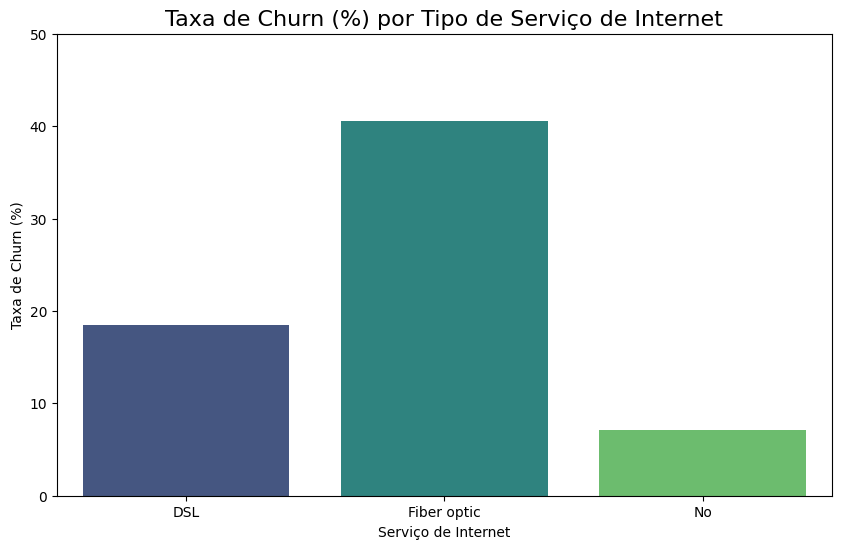

In [26]:
# Importando todas as bibliotecas necessárias
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- ETAPA 1: EXTRAÇÃO ---
    url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
    response = requests.get(url)
    response.raise_for_status()
    dados_json = response.json()
    df = pd.json_normalize(dados_json)

    # --- ETAPA 2: TRANSFORMAÇÃO ---

    # A. Limpando valores vazios em 'Churn'
    df['Churn'] = df['Churn'].replace('', 'No')

    # B. Renomeando colunas
    novos_nomes = {
        'customer.gender': 'Gender', 'customer.SeniorCitizen': 'SeniorCitizen', 'customer.Partner': 'Partner',
        'customer.Dependents': 'Dependents', 'customer.tenure': 'tenure', 'phone.PhoneService': 'PhoneService',
        'phone.MultipleLines': 'MultipleLines', 'internet.InternetService': 'InternetService',
        'internet.OnlineSecurity': 'OnlineSecurity', 'internet.OnlineBackup': 'OnlineBackup',
        'internet.DeviceProtection': 'DeviceProtection', 'internet.TechSupport': 'TechSupport',
        'internet.StreamingTV': 'StreamingTV', 'internet.StreamingMovies': 'StreamingMovies',
        'account.Contract': 'Contract', 'account.PaperlessBilling': 'PaperlessBilling',
        'account.PaymentMethod': 'PaymentMethod', 'account.Charges.Monthly': 'MonthlyCharges',
        'account.Charges.Total': 'TotalCharges'
    }
    df.rename(columns=novos_nomes, inplace=True)

    # C. Convertendo a coluna 'Churn' para 1 e 0
    mapa_churn = {'Yes': 1, 'No': 0}
    df['Churn'] = df['Churn'].map(mapa_churn)

    # D. Limpando e convertendo outras colunas
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

    colunas_com_servico = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in colunas_com_servico:
        df[col] = df[col].replace({'No internet service': 'No'})
    df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

    colunas_sim_nao = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'PaperlessBilling']
    for coluna in colunas_sim_nao:
        df[coluna] = df[coluna].map({'Yes': 1, 'No': 0})


    # --- ETAPA 3: ANÁLISE ---

    print("\n--- RELATÓRIO DE ANÁLISE DE CHURN ---")

    total_clientes = len(df)
    clientes_churn = df['Churn'].sum()
    taxa_churn_geral = (clientes_churn / total_clientes) * 100

    print(f"\nTotal de Clientes na Base: {total_clientes}")
    print(f"Total de Clientes que Cancelaram (Churn): {clientes_churn}")
    print(f"Taxa de Churn Geral: {taxa_churn_geral:.2f}%\n")

    churn_por_internet = df.groupby('InternetService')['Churn'].mean() * 100
    print("--- Taxa de Churn por Tipo de Serviço de Internet ---")
    print(churn_por_internet.round(2))

    bins = [0, 12, 24, 48, 60, 73]
    labels = ['0-12 Meses', '13-24 Meses', '25-48 Meses', '49-60 Meses', '61-72 Meses']
    df['Faixa_Tenure'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

    churn_por_tenure = df.groupby('Faixa_Tenure')['Churn'].mean() * 100
    print("\n--- Taxa de Churn por Tempo de Contrato (Tenure) ---")
    print(churn_por_tenure.round(2))

    # --- Visualização Gráfica ---
    plt.figure(figsize=(10, 6))
    sns.barplot(x=churn_por_internet.index, y=churn_por_internet.values, palette='viridis')
    plt.title('Taxa de Churn (%) por Tipo de Serviço de Internet', fontsize=16)
    plt.ylabel('Taxa de Churn (%)')
    plt.xlabel('Serviço de Internet')
    plt.ylim(0, 50)
    plt.show()

except Exception as e:
    print(f"\n OCORREU UM ERRO INESPERADO: {e}")